In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train/=255
x_test/=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

50000 train samples
10000 test samples


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


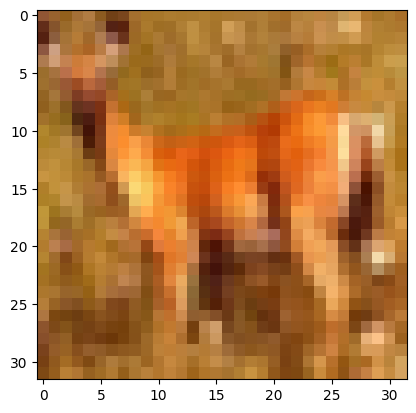

In [ ]:
import pylab as plt
print('label:',y_test[110])
plt.imshow(x_test[110].reshape(32,32,3))
plt.show()

In [ ]:
model=Sequential()
model.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 32)                100384    
                                                        

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test,y_test))

Epoch 1/20
391/391 [==============================] - 17s 9ms/step - loss: 2.0492 - accuracy: 0.2261 - val_loss: 1.7193 - val_accuracy: 0.4072
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.8347 - accuracy: 0.2993 - val_loss: 1.5880 - val_accuracy: 0.4460
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 1.7631 - accuracy: 0.3249 - val_loss: 1.5586 - val_accuracy: 0.4585
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 1.7262 - accuracy: 0.3425 - val_loss: 1.5215 - val_accuracy: 0.4640
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 1.6964 - accuracy: 0.3493 - val_loss: 1.4913 - val_accuracy: 0.4998
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 1.6554 - accuracy: 0.3722 - val_loss: 1.4327 - val_accuracy: 0.5025
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 1.6223 - accuracy: 0.3876 - val_loss: 1.3902 - val_accuracy: 0.5287
Epoch

In [ ]:
score = model.evaluate(x_test,y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

Test Loss:  1.1923574209213257
Test Accuracy:  0.5817000269889832


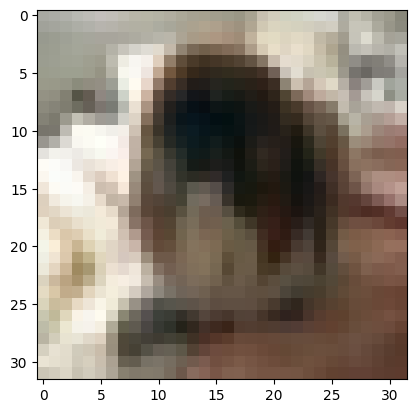

In [ ]:
import pylab as plt
plt.imshow(x_test[200].reshape(32,32,3), cmap= 'gray')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

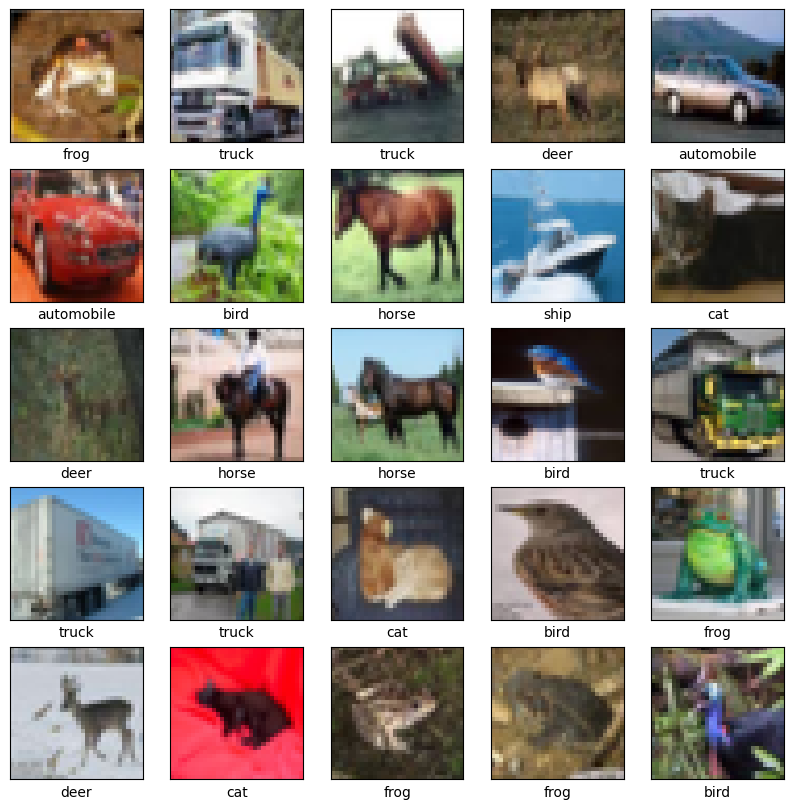

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5286 - accuracy: 0.4427 - val_loss: 1.2329 - val_accuracy: 0.5598
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1579 - accuracy: 0.5899 - val_loss: 1.0617 - val_accuracy: 0.6265
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0037 - accuracy: 0.6469 - val_loss: 0.9637 - val_accuracy: 0.6631
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9071 - accuracy: 0.6831 - val_loss: 0.9537 - val_accuracy: 0.6669
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8306 - accuracy: 0.7087 - val_loss: 0.9340 - val_accuracy: 0.6789
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7687 - accuracy: 0.7321 - val_loss: 0.9095 - val_accuracy: 0.6841
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7162 - accuracy: 0.7489 - val_loss: 0.8728 - val_accuracy

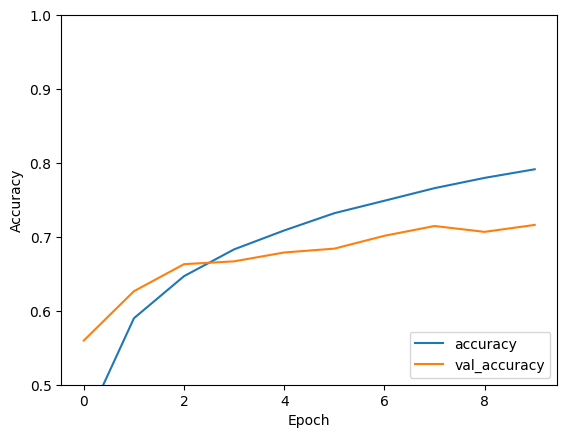

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print(test_acc)
print(test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.8613 - accuracy: 0.7162
0.7161999940872192
0.8613362312316895
